# Spam classsification

In [13]:
import pandas as pd
import re
from nltk.corpus import stopwords
import numpy as np
%matplotlib inline
import sys  
from sklearn.feature_extraction.text import CountVectorizer
reload(sys)  
sys.setdefaultencoding('utf8')

In [14]:
tweets = pd.read_csv("tweets.csv",header=0)

In [15]:
tweets.head()

,id,tweet,spam
0,1,via @pmpg65: @trafficLARA @PJGZLEZ la locura ...,0
1,2,via @SotoKv: @photojcg al parecer fuegos arti...,0
2,3,via @PJGZLEZ: ellos se comen una torta de mas ...,0
3,4,via @SobrePC: bomba artificiales en el core 3...,0
4,5,via @econ\\_carlos: Muerto no cumple años la v...,0


### Ham vs Spam

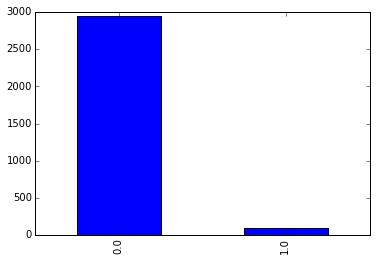

In [16]:
tweets.spam.value_counts().plot(kind = "bar")

# Text processing

In [5]:
def only_text(text):
    return re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)|[^a-zA-Z]|via|(http:\/\/\w+.+?\w+\/?\w+?)"," ",text)

In [6]:
def to_lower(text):
    return text.lower().strip()

In [7]:
def remove_stop_words(text):
    return [w for w in text.split() if w not in stopwords.words('spanish')]

In [8]:
tweets['tweet'] = tweets['tweet'].apply(only_text)

In [9]:
tweets['tweet'] = tweets['tweet'].apply(to_lower)

# Word counts

In [10]:
vectorizer = CountVectorizer(min_df=2,max_features = 500)
X = vectorizer.fit_transform(tweets['tweet'])

In [11]:
words = pd.DataFrame(X.A, columns=vectorizer.get_feature_names())

In [12]:
words.groupby(vectorizer.get_feature_names()).size()

aba  abierta  abuso  ac  accidente  actual  acuerdo  adivinar  ado  aeropuerto  agua  ah  ahora  aires  aja  al  alanhdez  alc  aldaba  ales  alexmcbo  algo  alguien  alimentos  all  alli  alumbrado  am  amigo  amigos  an  ana  antes  antojitoselmejorcupcake  antojitoslamejortortadechocolate  apensar  apoya  aqu  aqui  arroz  as  aun  av  aviso  ay  ayer  ayuda  bachaqueo  bachaqueros  bajo  bancario  banco  bancos  basura  bd  bella  bien  billetes  blanca  blico  bo  bol  bs  buen  buenas  bueno  busmetromara  ca  cabimas  cada  calle  cambio  camioneta  canal  cantv  caracas  caribe  carro  carros  casa  casi  cauchos  centro  centrodeconvenciones  cerca  cerrado  chapo  chip  choque  cierto  ciudad  claro  cll  co  col  cola  colas  colegio  comer  comida  como  comprar  con  conciencia  conseguir  consigue  contacto  contra  control  corpoeleczulia  cosa  creo  cu  cualquier  cuando  cuesta  cupis  da  dame  dan  dar  de  debe  debemos  decir  del  delicias  dentro  denuncia  depe